<a href="https://colab.research.google.com/github/LAODERUSMIANTO/CONTOH/blob/main/DIAGRAM_BIVARIATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Path ke file Excel
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun1.xlsx'

# Membaca file Excel
try:
    # Membaca semua sheet
    excel_data = pd.ExcelFile(file_path)

    # Menampilkan semua nama sheet di file Excel
    print("Sheet yang tersedia dalam file:")
    print(excel_data.sheet_names)

    # Membaca sheet pertama (atau Anda bisa memilih sheet lain)
    df = excel_data.parse(sheet_name=0)

    # Menampilkan 5 baris pertama data
    print("\n5 Baris Pertama Data:")
    print(df.head())

    # Menampilkan informasi tentang kolom
    print("\nInformasi Kolom:")
    print(df.info())

    # Menampilkan statistik dasar untuk data numerik
    print("\nStatistik Deskriptif Data Numerik:")
    print(df.describe())

except Exception as e:
    print(f"Terjadi kesalahan saat membaca file: {e}")


Sheet yang tersedia dalam file:
['Sheet1']

5 Baris Pertama Data:
                TAHUN       SWH  PERIODE
0 2019-01-01 00:00:00  0.240884  1.98030
1 2019-01-01 03:00:00  0.254605  1.90896
2 2019-01-01 06:00:00  0.496378  3.01935
3 2019-01-01 09:00:00  0.350352  2.50658
4 2019-01-01 12:00:00  0.253171  1.95412

Informasi Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TAHUN    14578 non-null  datetime64[ns]
 1   SWH      14578 non-null  float64       
 2   PERIODE  14578 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 341.8 KB
None

Statistik Deskriptif Data Numerik:
                               TAHUN           SWH       PERIODE
count                          14578  14578.000000  14578.000000
mean   2021-07-01 13:29:24.439566336      0.447782      2.575786
min              2019-01-01 00:00:00    

# **ukuran bin**

# **PEMBUATAN DIAGRAM BIVARIATE**

# **STASIUN 8**

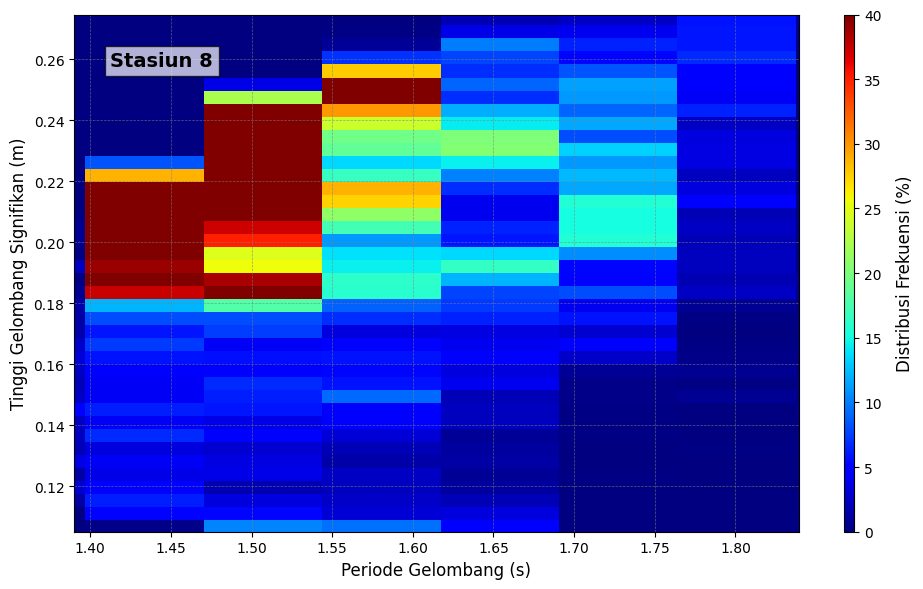

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Path ke file Excel
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun8.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan (opsional)
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Membuat histogram 2D (heatmap)
hb = plt.hist2d(
    df['Te'], df['Hs'], bins=(50, 50), cmap='jet', density=True, vmin=0, vmax=40
)

# Menambahkan colorbar dengan rentang 0-40
cb = plt.colorbar(hb[3], ax=plt.gca(), orientation='vertical', aspect=50)
cb.set_label('Distribusi Frekuensi (%)', fontsize=12, labelpad=10)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('', fontsize=14, weight='bold')

# Menyesuaikan batas sumbu untuk memusatkan distribusi
te_min, te_max = np.percentile(df['Te'], [1, 99])  # Percentile 1% dan 99%
hs_min, hs_max = np.percentile(df['Hs'], [1, 99])  # Percentile 1% dan 99%
plt.xlim(te_min, te_max)
plt.ylim(hs_min, hs_max)

# Menambahkan keterangan "Stasiun 10" di dalam plot
plt.text(
    te_min + (te_max - te_min) * 0.05,  # Posisi X (sedikit di dalam dari te_min)
    hs_max - (hs_max - hs_min) * 0.1,  # Posisi Y (sedikit di bawah hs_max)
    'Stasiun 8',
    fontsize=14,
    color='black',
    weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)  # Background putih semi-transparan
)

# Menyesuaikan latar belakang menjadi putih dan menambahkan grid profesional
plt.gca().set_facecolor('white')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Menampilkan grid kecil di kedua sumbu
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=False))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=False))

# Menampilkan plot
plt.tight_layout()
plt.show()


# ***pembaruan rentang nilai scalenya ***

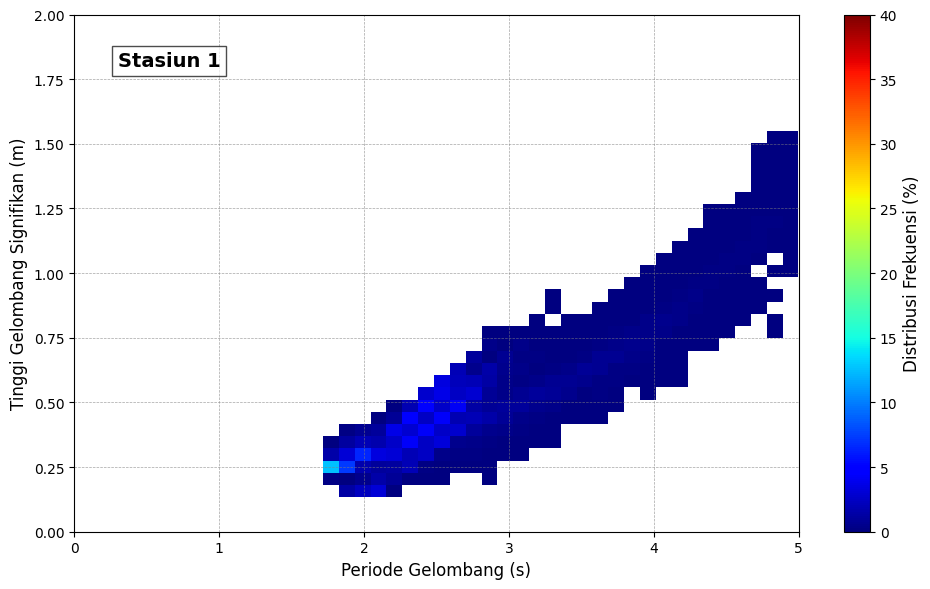

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Path ke file Excel
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun1.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan (opsional)
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Membuat histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Masking untuk menyembunyikan nilai nol di histogram
counts = hb[0]
counts_masked = np.ma.masked_where(counts == 0, counts)  # Mask nilai nol

# Menggambar ulang heatmap dengan masked array
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(hb[1], hb[2], counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('', fontsize=14, weight='bold')

# Menentukan rentang sumbu sesuai permintaan
plt.xlim(0, 5)  # Rentang sumbu X
plt.ylim(0, 2)  # Rentang sumbu Y

# Menambahkan anotasi "Stasiun 1"
plt.text(
    0.3, 1.8, 'Stasiun 1',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menyesuaikan tampilan grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


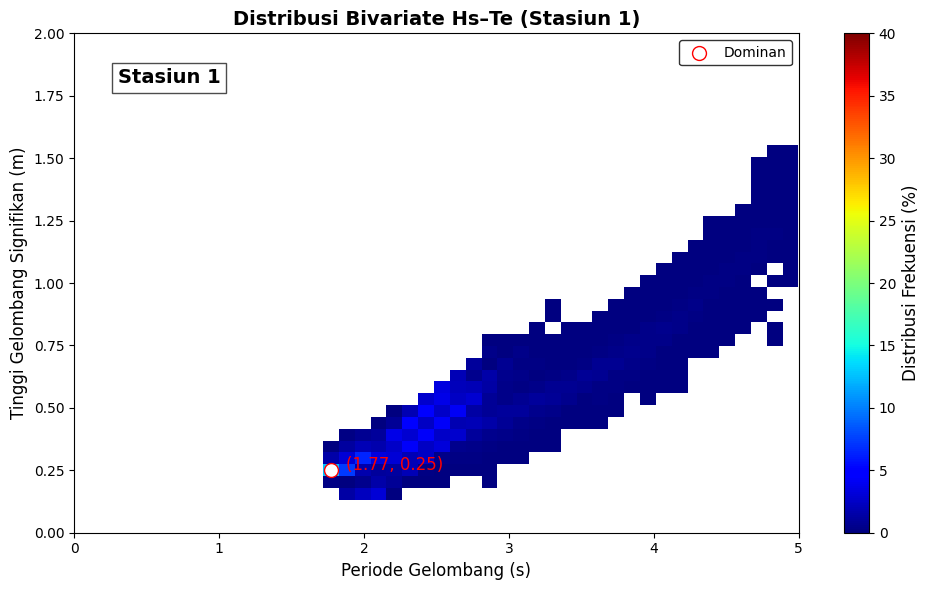

=== Analisis Distribusi Frekuensi Dominan ===
Tinggi Gelombang Signifikan Dominan (Hs): 0.25 meter
Periode Gelombang Dominan (Te): 1.77 detik
Frekuensi Distribusi Dominan: 1264.21 %


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path ke file Excel baru (stasiun9.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun1.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Ekstrak data dari histogram untuk analisis frekuensi dominan
counts, x_edges, y_edges = np.array(hb[0]), hb[1], hb[2]  # Pastikan counts adalah array NumPy
max_index_flat = np.argmax(counts)  # Indeks maksimum dalam bentuk flat
max_freq_index = np.unravel_index(max_index_flat, counts.shape)  # Indeks 2D

# Menghitung Te dan Hs dominan berdasarkan indeks maksimum
Te_dominant = (x_edges[max_freq_index[0]] + x_edges[max_freq_index[0] + 1]) / 2
Hs_dominant = (y_edges[max_freq_index[1]] + y_edges[max_freq_index[1] + 1]) / 2
max_freq_value = counts[max_freq_index] * 100  # Konversi ke persen

# Plot heatmap dengan masking nol
counts_masked = np.ma.masked_where(counts == 0, counts)
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(x_edges, y_edges, counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('Distribusi Bivariate Hs–Te (Stasiun 1)', fontsize=14, weight='bold')

# Menandai nilai dominan pada plot
plt.scatter(Te_dominant, Hs_dominant, color='white', edgecolor='red', s=100, label='Dominan')
plt.text(Te_dominant + 0.1, Hs_dominant, f'({Te_dominant:.2f}, {Hs_dominant:.2f})', color='red', fontsize=12)

# Menentukan rentang sumbu
plt.xlim(0, 5)
plt.ylim(0, 2)

# Menambahkan anotasi "Stasiun 1"
plt.text(
    0.3, 1.8, 'Stasiun 1',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menampilkan legenda
plt.legend(loc='upper right', fontsize=10, edgecolor='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan analisis frekuensi dominan
print("=== Analisis Distribusi Frekuensi Dominan ===")
print(f"Tinggi Gelombang Signifikan Dominan (Hs): {Hs_dominant:.2f} meter")
print(f"Periode Gelombang Dominan (Te): {Te_dominant:.2f} detik")
print(f"Frekuensi Distribusi Dominan: {max_freq_value:.2f} %")


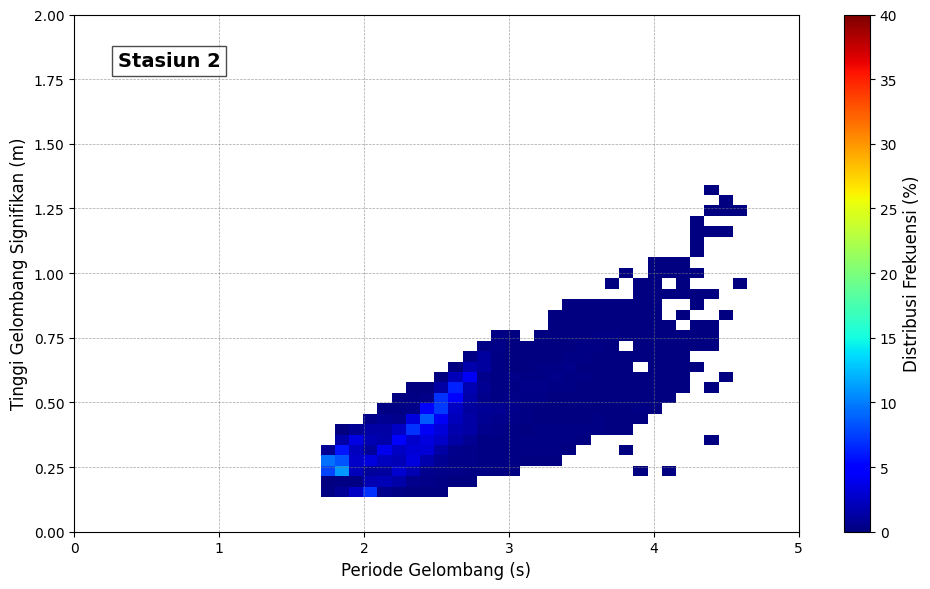

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Path ke file Excel (stasiun10.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun2.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan (opsional)
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Membuat histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Masking untuk menyembunyikan nilai nol di histogram
counts = hb[0]
counts_masked = np.ma.masked_where(counts == 0, counts)  # Mask nilai nol

# Menggambar ulang heatmap dengan masked array
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(hb[1], hb[2], counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('', fontsize=14, weight='bold')

# Menentukan rentang sumbu sesuai permintaan
plt.xlim(0, 5)  # Rentang sumbu X
plt.ylim(0, 2)  # Rentang sumbu Y

# Menambahkan anotasi "Stasiun 2"
plt.text(
    0.3, 1.8, 'Stasiun 2',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menyesuaikan tampilan grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


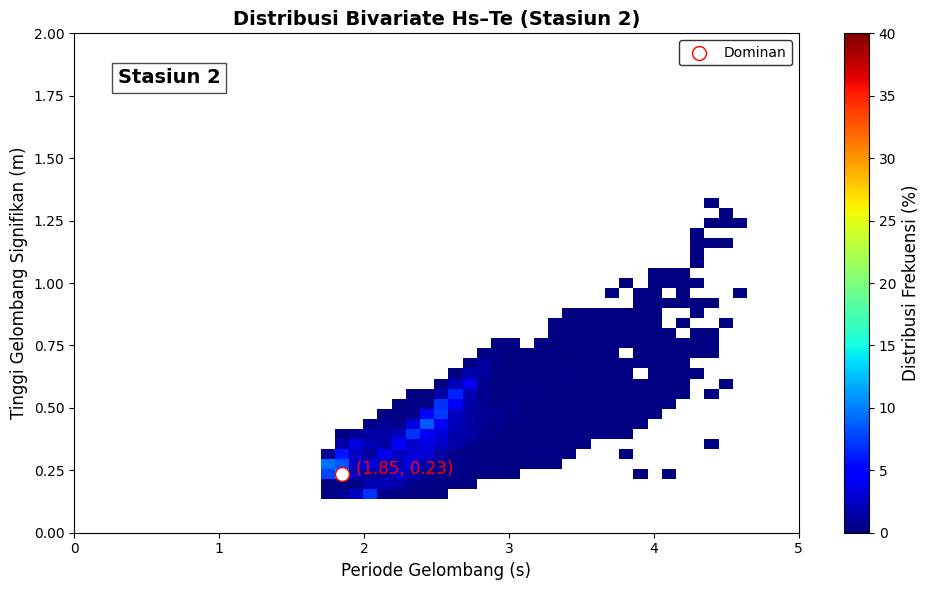

=== Analisis Distribusi Frekuensi Dominan ===
Tinggi Gelombang Signifikan Dominan (Hs): 0.23 meter
Periode Gelombang Dominan (Te): 1.85 detik
Frekuensi Distribusi Dominan: 1099.30 %


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path ke file Excel baru (stasiun9.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun2.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Ekstrak data dari histogram untuk analisis frekuensi dominan
counts, x_edges, y_edges = np.array(hb[0]), hb[1], hb[2]  # Pastikan counts adalah array NumPy
max_index_flat = np.argmax(counts)  # Indeks maksimum dalam bentuk flat
max_freq_index = np.unravel_index(max_index_flat, counts.shape)  # Indeks 2D

# Menghitung Te dan Hs dominan berdasarkan indeks maksimum
Te_dominant = (x_edges[max_freq_index[0]] + x_edges[max_freq_index[0] + 1]) / 2
Hs_dominant = (y_edges[max_freq_index[1]] + y_edges[max_freq_index[1] + 1]) / 2
max_freq_value = counts[max_freq_index] * 100  # Konversi ke persen

# Plot heatmap dengan masking nol
counts_masked = np.ma.masked_where(counts == 0, counts)
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(x_edges, y_edges, counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('Distribusi Bivariate Hs–Te (Stasiun 2)', fontsize=14, weight='bold')

# Menandai nilai dominan pada plot
plt.scatter(Te_dominant, Hs_dominant, color='white', edgecolor='red', s=100, label='Dominan')
plt.text(Te_dominant + 0.1, Hs_dominant, f'({Te_dominant:.2f}, {Hs_dominant:.2f})', color='red', fontsize=12)

# Menentukan rentang sumbu
plt.xlim(0, 5)
plt.ylim(0, 2)

# Menambahkan anotasi "Stasiun 2"
plt.text(
    0.3, 1.8, 'Stasiun 2',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menampilkan legenda
plt.legend(loc='upper right', fontsize=10, edgecolor='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan analisis frekuensi dominan
print("=== Analisis Distribusi Frekuensi Dominan ===")
print(f"Tinggi Gelombang Signifikan Dominan (Hs): {Hs_dominant:.2f} meter")
print(f"Periode Gelombang Dominan (Te): {Te_dominant:.2f} detik")
print(f"Frekuensi Distribusi Dominan: {max_freq_value:.2f} %")


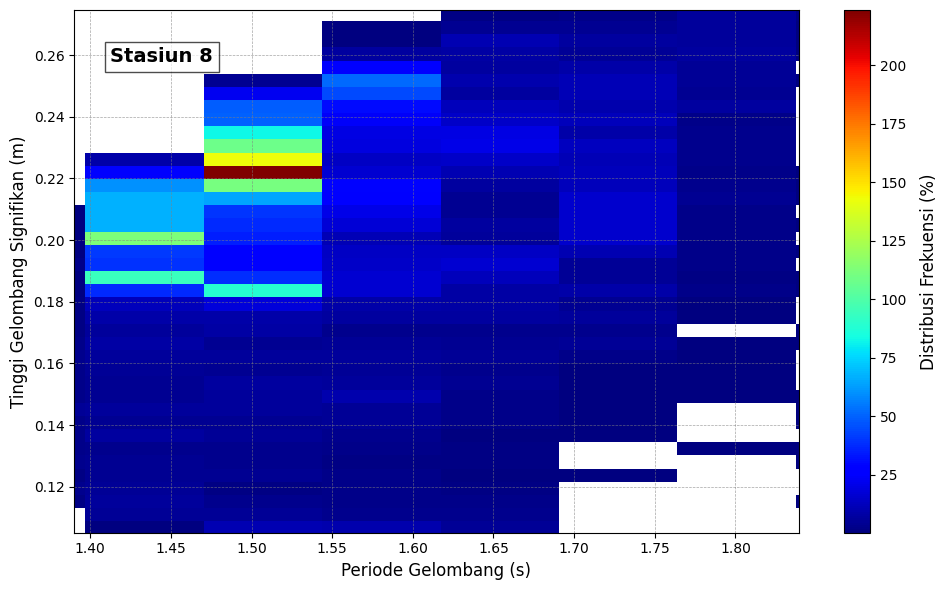

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Path ke file Excel untuk Stasiun 8
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun8.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan (opsional)
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Membuat histogram 2D dengan density=True (normalisasi frekuensi)
hb = plt.hist2d(df['Te'], df['Hs'], bins=(50, 50), cmap='jet', density=True)

# Masking untuk menyembunyikan nilai nol
counts = hb[0]
counts_masked = np.ma.masked_where(counts == 0, counts)

# Menggambar ulang heatmap dengan masking
plt.clf()  # Menghapus plot sebelumnya
plt.pcolormesh(hb[1], hb[2], counts_masked.T, cmap='jet', shading='auto')

# Menambahkan colorbar untuk distribusi frekuensi (tetap)
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12, labelpad=10)
cb.ax.tick_params(labelsize=10)

# Menyesuaikan batas sumbu dengan percentile 1% - 99% untuk fokus distribusi
te_min, te_max = np.percentile(df['Te'], [1, 99])
hs_min, hs_max = np.percentile(df['Hs'], [1, 99])
plt.xlim(te_min, te_max)
plt.ylim(hs_min, hs_max)

# Menambahkan label sumbu dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('', fontsize=14, weight='bold')

# Menambahkan anotasi "Stasiun 8" di dalam plot
plt.text(
    te_min + (te_max - te_min) * 0.05,  # Posisi X (5% dari rentang Te)
    hs_max - (hs_max - hs_min) * 0.1,  # Posisi Y (10% dari rentang Hs)
    'Stasiun 8',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menyesuaikan grid dan latar belakang
plt.gca().set_facecolor('white')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Menampilkan grid kecil di kedua sumbu
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=False))
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=False))

# Menampilkan plot
plt.tight_layout()
plt.show()


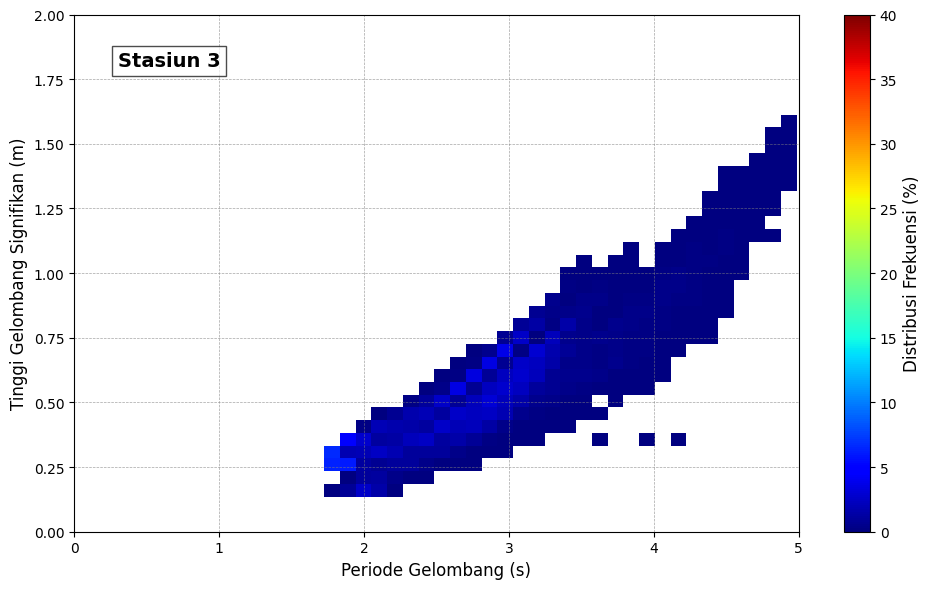

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Path ke file Excel (stasiun10.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun3.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan (opsional)
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Membuat histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Masking untuk menyembunyikan nilai nol di histogram
counts = hb[0]
counts_masked = np.ma.masked_where(counts == 0, counts)  # Mask nilai nol

# Menggambar ulang heatmap dengan masked array
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(hb[1], hb[2], counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('', fontsize=14, weight='bold')

# Menentukan rentang sumbu sesuai permintaan
plt.xlim(0, 5)  # Rentang sumbu X
plt.ylim(0, 2)  # Rentang sumbu Y

# Menambahkan anotasi "Stasiun 2"
plt.text(
    0.3, 1.8, 'Stasiun 3',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menyesuaikan tampilan grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


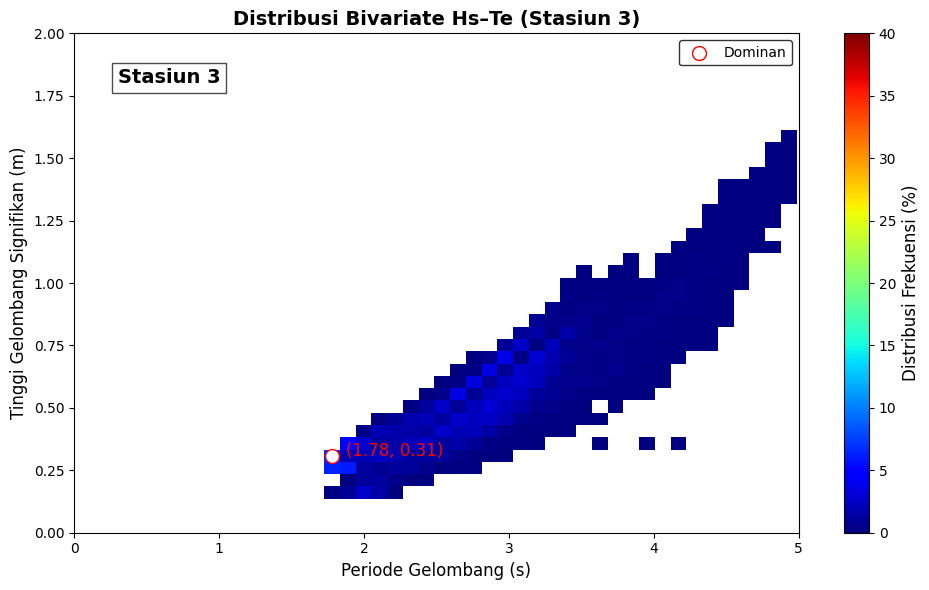

=== Analisis Distribusi Frekuensi Dominan ===
Tinggi Gelombang Signifikan Dominan (Hs): 0.31 meter
Periode Gelombang Dominan (Te): 1.78 detik
Frekuensi Distribusi Dominan: 659.55 %


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path ke file Excel baru (stasiun9.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun3.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Ekstrak data dari histogram untuk analisis frekuensi dominan
counts, x_edges, y_edges = np.array(hb[0]), hb[1], hb[2]  # Pastikan counts adalah array NumPy
max_index_flat = np.argmax(counts)  # Indeks maksimum dalam bentuk flat
max_freq_index = np.unravel_index(max_index_flat, counts.shape)  # Indeks 2D

# Menghitung Te dan Hs dominan berdasarkan indeks maksimum
Te_dominant = (x_edges[max_freq_index[0]] + x_edges[max_freq_index[0] + 1]) / 2
Hs_dominant = (y_edges[max_freq_index[1]] + y_edges[max_freq_index[1] + 1]) / 2
max_freq_value = counts[max_freq_index] * 100  # Konversi ke persen

# Plot heatmap dengan masking nol
counts_masked = np.ma.masked_where(counts == 0, counts)
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(x_edges, y_edges, counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('Distribusi Bivariate Hs–Te (Stasiun 3)', fontsize=14, weight='bold')

# Menandai nilai dominan pada plot
plt.scatter(Te_dominant, Hs_dominant, color='white', edgecolor='red', s=100, label='Dominan')
plt.text(Te_dominant + 0.1, Hs_dominant, f'({Te_dominant:.2f}, {Hs_dominant:.2f})', color='red', fontsize=12)

# Menentukan rentang sumbu
plt.xlim(0, 5)
plt.ylim(0, 2)

# Menambahkan anotasi "Stasiun 3"
plt.text(
    0.3, 1.8, 'Stasiun 3',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menampilkan legenda
plt.legend(loc='upper right', fontsize=10, edgecolor='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan analisis frekuensi dominan
print("=== Analisis Distribusi Frekuensi Dominan ===")
print(f"Tinggi Gelombang Signifikan Dominan (Hs): {Hs_dominant:.2f} meter")
print(f"Periode Gelombang Dominan (Te): {Te_dominant:.2f} detik")
print(f"Frekuensi Distribusi Dominan: {max_freq_value:.2f} %")


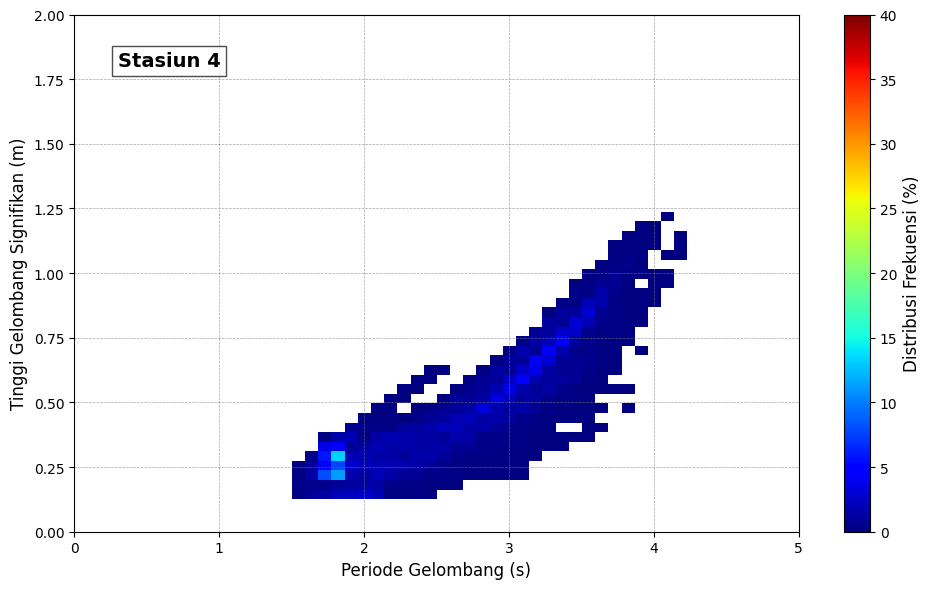

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Path ke file Excel (stasiun10.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun4.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan (opsional)
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Membuat histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Masking untuk menyembunyikan nilai nol di histogram
counts = hb[0]
counts_masked = np.ma.masked_where(counts == 0, counts)  # Mask nilai nol

# Menggambar ulang heatmap dengan masked array
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(hb[1], hb[2], counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('', fontsize=14, weight='bold')

# Menentukan rentang sumbu sesuai permintaan
plt.xlim(0, 5)  # Rentang sumbu X
plt.ylim(0, 2)  # Rentang sumbu Y

# Menambahkan anotasi "Stasiun 2"
plt.text(
    0.3, 1.8, 'Stasiun 4',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menyesuaikan tampilan grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


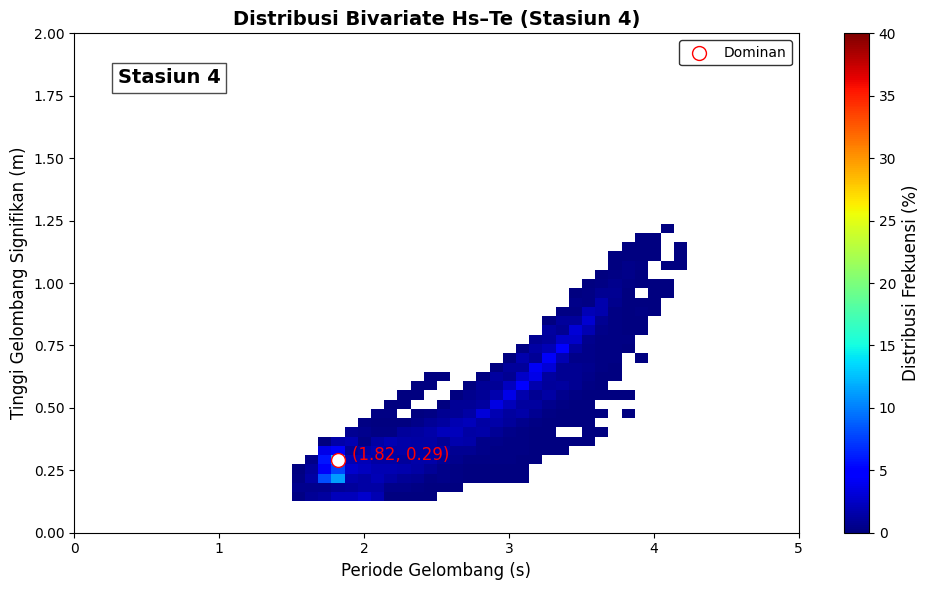

=== Analisis Distribusi Frekuensi Dominan ===
Tinggi Gelombang Signifikan Dominan (Hs): 0.29 meter
Periode Gelombang Dominan (Te): 1.82 detik
Frekuensi Distribusi Dominan: 1324.02 %


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path ke file Excel baru (stasiun9.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun4.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Ekstrak data dari histogram untuk analisis frekuensi dominan
counts, x_edges, y_edges = np.array(hb[0]), hb[1], hb[2]  # Pastikan counts adalah array NumPy
max_index_flat = np.argmax(counts)  # Indeks maksimum dalam bentuk flat
max_freq_index = np.unravel_index(max_index_flat, counts.shape)  # Indeks 2D

# Menghitung Te dan Hs dominan berdasarkan indeks maksimum
Te_dominant = (x_edges[max_freq_index[0]] + x_edges[max_freq_index[0] + 1]) / 2
Hs_dominant = (y_edges[max_freq_index[1]] + y_edges[max_freq_index[1] + 1]) / 2
max_freq_value = counts[max_freq_index] * 100  # Konversi ke persen

# Plot heatmap dengan masking nol
counts_masked = np.ma.masked_where(counts == 0, counts)
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(x_edges, y_edges, counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('Distribusi Bivariate Hs–Te (Stasiun 4)', fontsize=14, weight='bold')

# Menandai nilai dominan pada plot
plt.scatter(Te_dominant, Hs_dominant, color='white', edgecolor='red', s=100, label='Dominan')
plt.text(Te_dominant + 0.1, Hs_dominant, f'({Te_dominant:.2f}, {Hs_dominant:.2f})', color='red', fontsize=12)

# Menentukan rentang sumbu
plt.xlim(0, 5)
plt.ylim(0, 2)

# Menambahkan anotasi "Stasiun 4"
plt.text(
    0.3, 1.8, 'Stasiun 4',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menampilkan legenda
plt.legend(loc='upper right', fontsize=10, edgecolor='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan analisis frekuensi dominan
print("=== Analisis Distribusi Frekuensi Dominan ===")
print(f"Tinggi Gelombang Signifikan Dominan (Hs): {Hs_dominant:.2f} meter")
print(f"Periode Gelombang Dominan (Te): {Te_dominant:.2f} detik")
print(f"Frekuensi Distribusi Dominan: {max_freq_value:.2f} %")


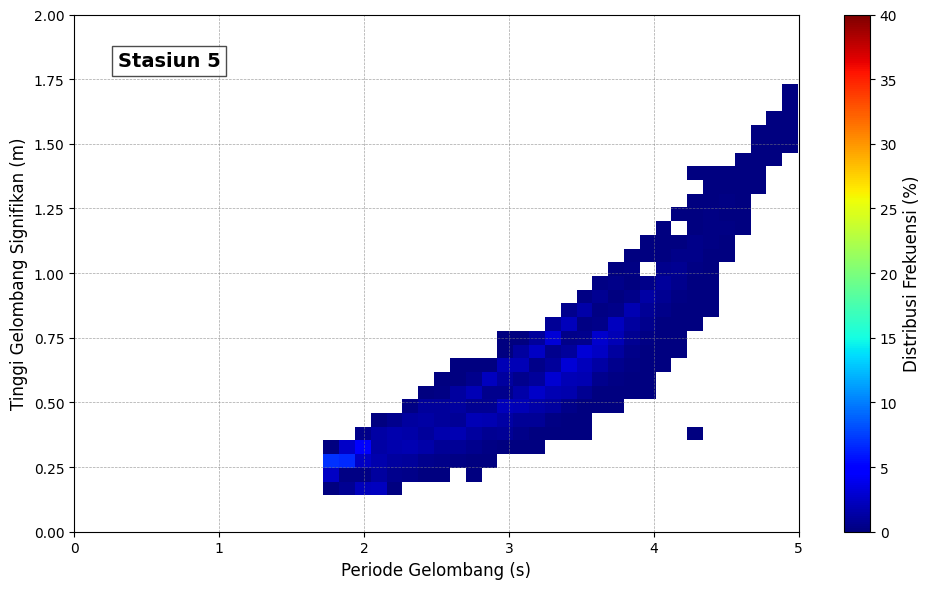

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Path ke file Excel (stasiun10.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun5.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan (opsional)
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Membuat histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Masking untuk menyembunyikan nilai nol di histogram
counts = hb[0]
counts_masked = np.ma.masked_where(counts == 0, counts)  # Mask nilai nol

# Menggambar ulang heatmap dengan masked array
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(hb[1], hb[2], counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('', fontsize=14, weight='bold')

# Menentukan rentang sumbu sesuai permintaan
plt.xlim(0, 5)  # Rentang sumbu X
plt.ylim(0, 2)  # Rentang sumbu Y

# Menambahkan anotasi "Stasiun 2"
plt.text(
    0.3, 1.8, 'Stasiun 5',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menyesuaikan tampilan grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


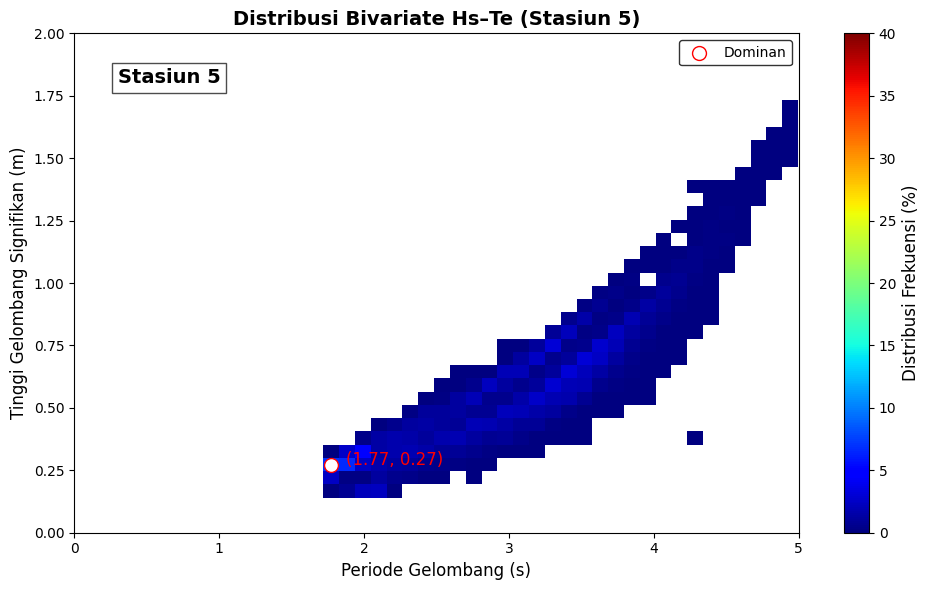

=== Analisis Distribusi Frekuensi Dominan ===
Tinggi Gelombang Signifikan Dominan (Hs): 0.27 meter
Periode Gelombang Dominan (Te): 1.77 detik
Frekuensi Distribusi Dominan: 688.60 %


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path ke file Excel baru (stasiun9.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun5.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Ekstrak data dari histogram untuk analisis frekuensi dominan
counts, x_edges, y_edges = np.array(hb[0]), hb[1], hb[2]  # Pastikan counts adalah array NumPy
max_index_flat = np.argmax(counts)  # Indeks maksimum dalam bentuk flat
max_freq_index = np.unravel_index(max_index_flat, counts.shape)  # Indeks 2D

# Menghitung Te dan Hs dominan berdasarkan indeks maksimum
Te_dominant = (x_edges[max_freq_index[0]] + x_edges[max_freq_index[0] + 1]) / 2
Hs_dominant = (y_edges[max_freq_index[1]] + y_edges[max_freq_index[1] + 1]) / 2
max_freq_value = counts[max_freq_index] * 100  # Konversi ke persen

# Plot heatmap dengan masking nol
counts_masked = np.ma.masked_where(counts == 0, counts)
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(x_edges, y_edges, counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('Distribusi Bivariate Hs–Te (Stasiun 5)', fontsize=14, weight='bold')

# Menandai nilai dominan pada plot
plt.scatter(Te_dominant, Hs_dominant, color='white', edgecolor='red', s=100, label='Dominan')
plt.text(Te_dominant + 0.1, Hs_dominant, f'({Te_dominant:.2f}, {Hs_dominant:.2f})', color='red', fontsize=12)

# Menentukan rentang sumbu
plt.xlim(0, 5)
plt.ylim(0, 2)

# Menambahkan anotasi "Stasiun 5"
plt.text(
    0.3, 1.8, 'Stasiun 5',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menampilkan legenda
plt.legend(loc='upper right', fontsize=10, edgecolor='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan analisis frekuensi dominan
print("=== Analisis Distribusi Frekuensi Dominan ===")
print(f"Tinggi Gelombang Signifikan Dominan (Hs): {Hs_dominant:.2f} meter")
print(f"Periode Gelombang Dominan (Te): {Te_dominant:.2f} detik")
print(f"Frekuensi Distribusi Dominan: {max_freq_value:.2f} %")


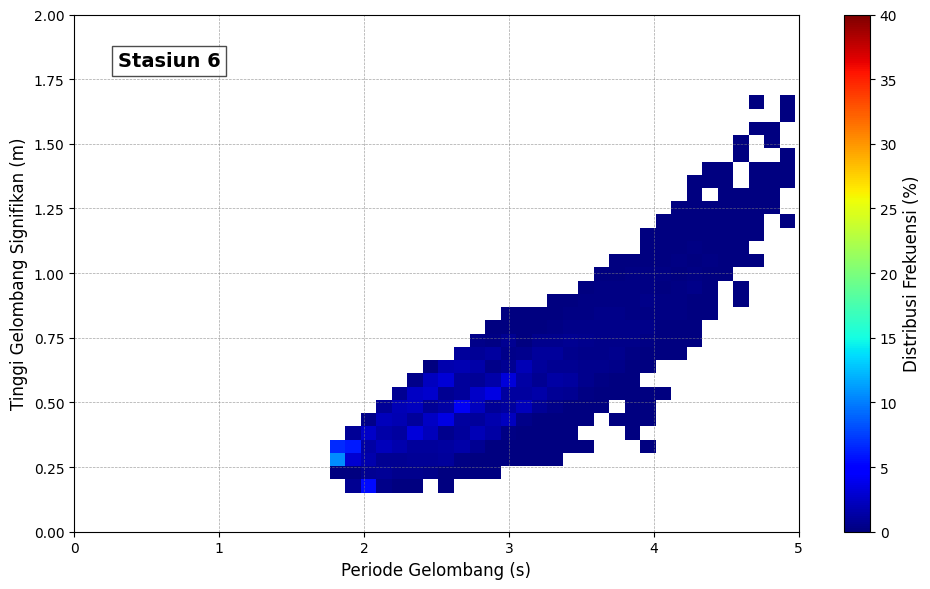

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Path ke file Excel (stasiun10.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun6.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan (opsional)
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Membuat histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Masking untuk menyembunyikan nilai nol di histogram
counts = hb[0]
counts_masked = np.ma.masked_where(counts == 0, counts)  # Mask nilai nol

# Menggambar ulang heatmap dengan masked array
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(hb[1], hb[2], counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('', fontsize=14, weight='bold')

# Menentukan rentang sumbu sesuai permintaan
plt.xlim(0, 5)  # Rentang sumbu X
plt.ylim(0, 2)  # Rentang sumbu Y

# Menambahkan anotasi "Stasiun 2"
plt.text(
    0.3, 1.8, 'Stasiun 6',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menyesuaikan tampilan grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


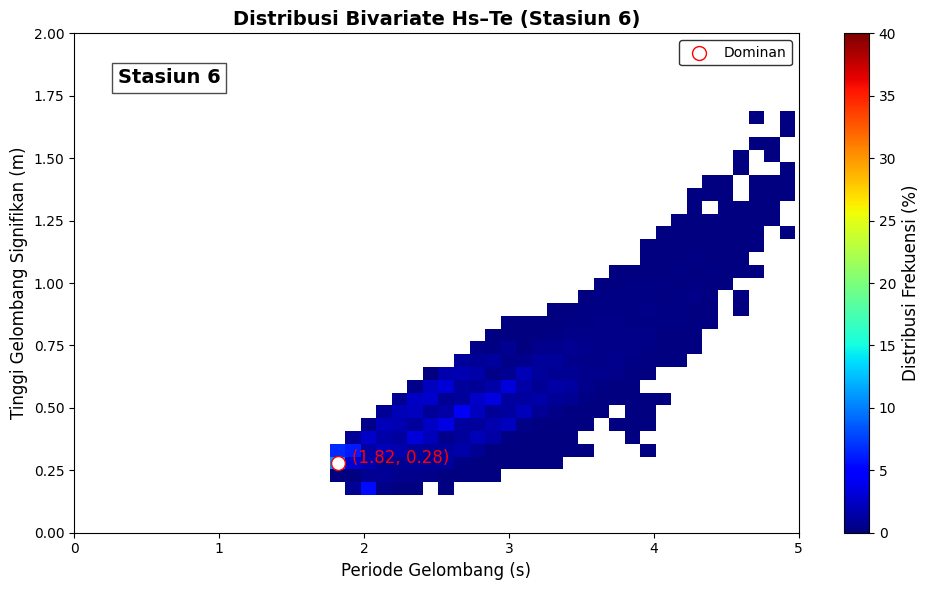

=== Analisis Distribusi Frekuensi Dominan ===
Tinggi Gelombang Signifikan Dominan (Hs): 0.28 meter
Periode Gelombang Dominan (Te): 1.82 detik
Frekuensi Distribusi Dominan: 1049.05 %


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path ke file Excel baru (stasiun9.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun6.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Ekstrak data dari histogram untuk analisis frekuensi dominan
counts, x_edges, y_edges = np.array(hb[0]), hb[1], hb[2]  # Pastikan counts adalah array NumPy
max_index_flat = np.argmax(counts)  # Indeks maksimum dalam bentuk flat
max_freq_index = np.unravel_index(max_index_flat, counts.shape)  # Indeks 2D

# Menghitung Te dan Hs dominan berdasarkan indeks maksimum
Te_dominant = (x_edges[max_freq_index[0]] + x_edges[max_freq_index[0] + 1]) / 2
Hs_dominant = (y_edges[max_freq_index[1]] + y_edges[max_freq_index[1] + 1]) / 2
max_freq_value = counts[max_freq_index] * 100  # Konversi ke persen

# Plot heatmap dengan masking nol
counts_masked = np.ma.masked_where(counts == 0, counts)
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(x_edges, y_edges, counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('Distribusi Bivariate Hs–Te (Stasiun 6)', fontsize=14, weight='bold')

# Menandai nilai dominan pada plot
plt.scatter(Te_dominant, Hs_dominant, color='white', edgecolor='red', s=100, label='Dominan')
plt.text(Te_dominant + 0.1, Hs_dominant, f'({Te_dominant:.2f}, {Hs_dominant:.2f})', color='red', fontsize=12)

# Menentukan rentang sumbu
plt.xlim(0, 5)
plt.ylim(0, 2)

# Menambahkan anotasi "Stasiun 6"
plt.text(
    0.3, 1.8, 'Stasiun 6',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menampilkan legenda
plt.legend(loc='upper right', fontsize=10, edgecolor='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan analisis frekuensi dominan
print("=== Analisis Distribusi Frekuensi Dominan ===")
print(f"Tinggi Gelombang Signifikan Dominan (Hs): {Hs_dominant:.2f} meter")
print(f"Periode Gelombang Dominan (Te): {Te_dominant:.2f} detik")
print(f"Frekuensi Distribusi Dominan: {max_freq_value:.2f} %")


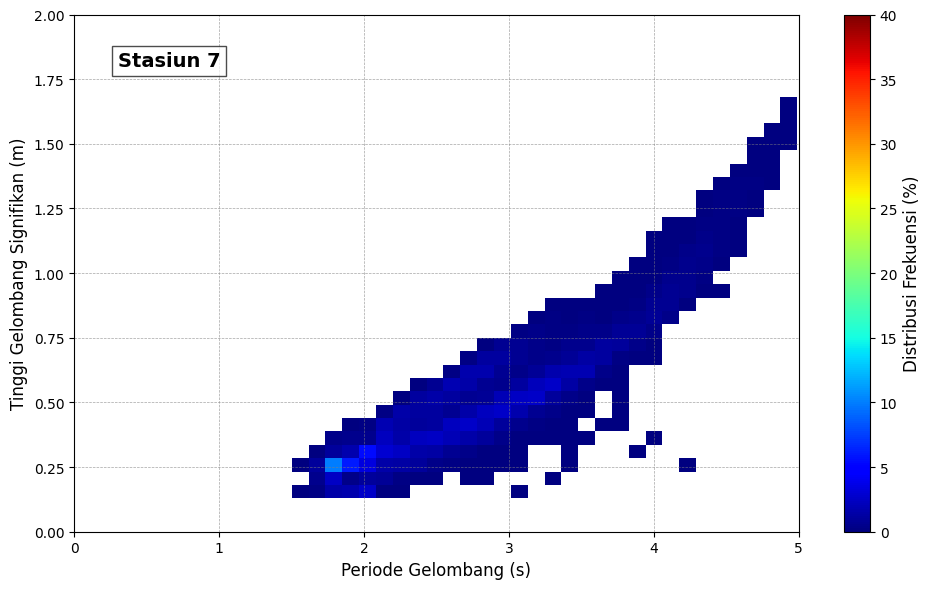

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Path ke file Excel (stasiun10.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun7.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan (opsional)
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Membuat histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Masking untuk menyembunyikan nilai nol di histogram
counts = hb[0]
counts_masked = np.ma.masked_where(counts == 0, counts)  # Mask nilai nol

# Menggambar ulang heatmap dengan masked array
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(hb[1], hb[2], counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('', fontsize=14, weight='bold')

# Menentukan rentang sumbu sesuai permintaan
plt.xlim(0, 5)  # Rentang sumbu X
plt.ylim(0, 2)  # Rentang sumbu Y

# Menambahkan anotasi "Stasiun 2"
plt.text(
    0.3, 1.8, 'Stasiun 7',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menyesuaikan tampilan grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


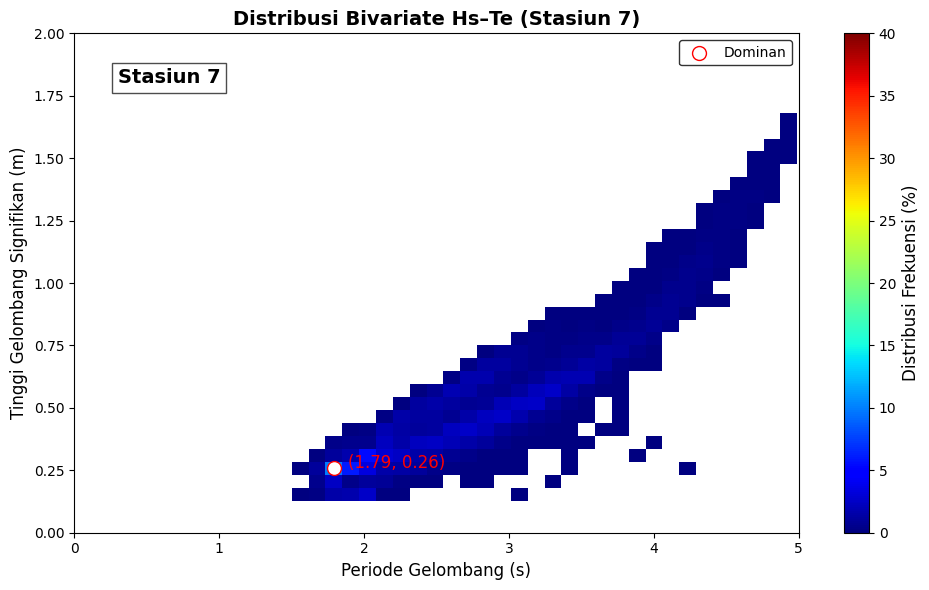

=== Analisis Distribusi Frekuensi Dominan ===
Tinggi Gelombang Signifikan Dominan (Hs): 0.26 meter
Periode Gelombang Dominan (Te): 1.79 detik
Frekuensi Distribusi Dominan: 993.69 %


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path ke file Excel baru (stasiun9.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun7.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Ekstrak data dari histogram untuk analisis frekuensi dominan
counts, x_edges, y_edges = np.array(hb[0]), hb[1], hb[2]  # Pastikan counts adalah array NumPy
max_index_flat = np.argmax(counts)  # Indeks maksimum dalam bentuk flat
max_freq_index = np.unravel_index(max_index_flat, counts.shape)  # Indeks 2D

# Menghitung Te dan Hs dominan berdasarkan indeks maksimum
Te_dominant = (x_edges[max_freq_index[0]] + x_edges[max_freq_index[0] + 1]) / 2
Hs_dominant = (y_edges[max_freq_index[1]] + y_edges[max_freq_index[1] + 1]) / 2
max_freq_value = counts[max_freq_index] * 100  # Konversi ke persen

# Plot heatmap dengan masking nol
counts_masked = np.ma.masked_where(counts == 0, counts)
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(x_edges, y_edges, counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('Distribusi Bivariate Hs–Te (Stasiun 7)', fontsize=14, weight='bold')

# Menandai nilai dominan pada plot
plt.scatter(Te_dominant, Hs_dominant, color='white', edgecolor='red', s=100, label='Dominan')
plt.text(Te_dominant + 0.1, Hs_dominant, f'({Te_dominant:.2f}, {Hs_dominant:.2f})', color='red', fontsize=12)

# Menentukan rentang sumbu
plt.xlim(0, 5)
plt.ylim(0, 2)

# Menambahkan anotasi "Stasiun 9"
plt.text(
    0.3, 1.8, 'Stasiun 7',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menampilkan legenda
plt.legend(loc='upper right', fontsize=10, edgecolor='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan analisis frekuensi dominan
print("=== Analisis Distribusi Frekuensi Dominan ===")
print(f"Tinggi Gelombang Signifikan Dominan (Hs): {Hs_dominant:.2f} meter")
print(f"Periode Gelombang Dominan (Te): {Te_dominant:.2f} detik")
print(f"Frekuensi Distribusi Dominan: {max_freq_value:.2f} %")


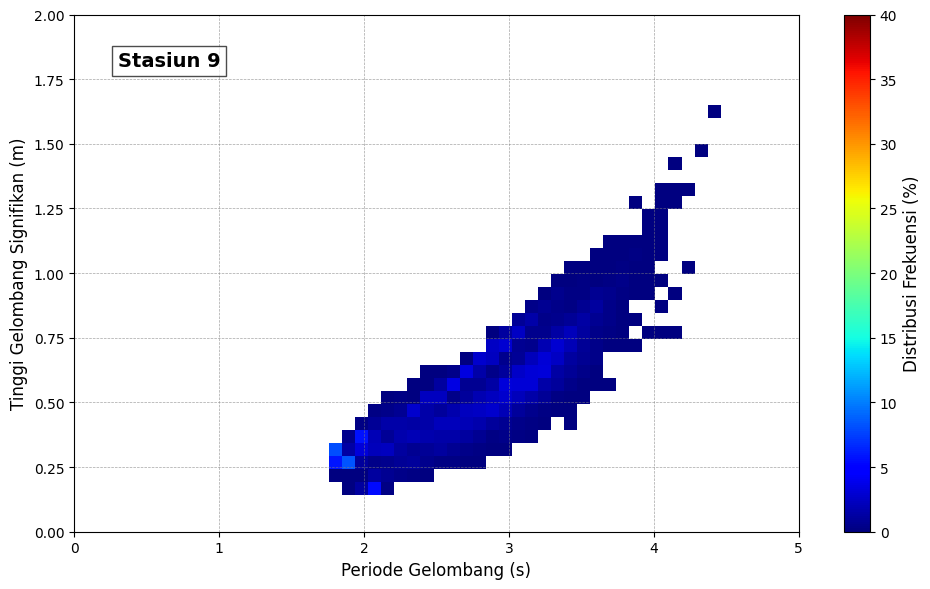

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Path ke file Excel (stasiun10.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun9.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan (opsional)
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Membuat histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Masking untuk menyembunyikan nilai nol di histogram
counts = hb[0]
counts_masked = np.ma.masked_where(counts == 0, counts)  # Mask nilai nol

# Menggambar ulang heatmap dengan masked array
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(hb[1], hb[2], counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('', fontsize=14, weight='bold')

# Menentukan rentang sumbu sesuai permintaan
plt.xlim(0, 5)  # Rentang sumbu X
plt.ylim(0, 2)  # Rentang sumbu Y

# Menambahkan anotasi "Stasiun 2"
plt.text(
    0.3, 1.8, 'Stasiun 9',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menyesuaikan tampilan grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


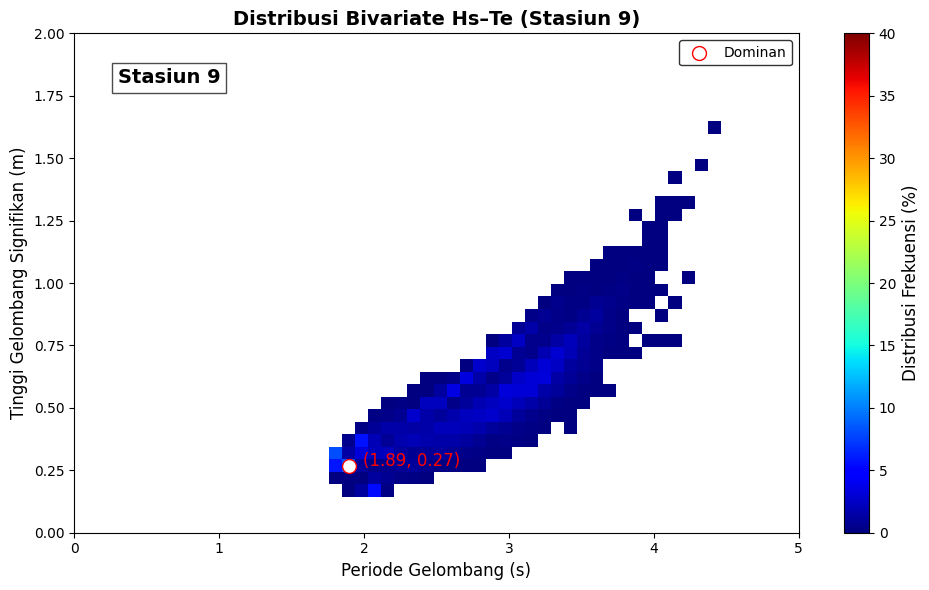

=== Analisis Distribusi Frekuensi Dominan ===
Tinggi Gelombang Signifikan Dominan (Hs): 0.27 meter
Periode Gelombang Dominan (Te): 1.89 detik
Frekuensi Distribusi Dominan: 839.43 %


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path ke file Excel baru (stasiun9.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun9.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Ekstrak data dari histogram untuk analisis frekuensi dominan
counts, x_edges, y_edges = np.array(hb[0]), hb[1], hb[2]  # Pastikan counts adalah array NumPy
max_index_flat = np.argmax(counts)  # Indeks maksimum dalam bentuk flat
max_freq_index = np.unravel_index(max_index_flat, counts.shape)  # Indeks 2D

# Menghitung Te dan Hs dominan berdasarkan indeks maksimum
Te_dominant = (x_edges[max_freq_index[0]] + x_edges[max_freq_index[0] + 1]) / 2
Hs_dominant = (y_edges[max_freq_index[1]] + y_edges[max_freq_index[1] + 1]) / 2
max_freq_value = counts[max_freq_index] * 100  # Konversi ke persen

# Plot heatmap dengan masking nol
counts_masked = np.ma.masked_where(counts == 0, counts)
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(x_edges, y_edges, counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('Distribusi Bivariate Hs–Te (Stasiun 9)', fontsize=14, weight='bold')

# Menandai nilai dominan pada plot
plt.scatter(Te_dominant, Hs_dominant, color='white', edgecolor='red', s=100, label='Dominan')
plt.text(Te_dominant + 0.1, Hs_dominant, f'({Te_dominant:.2f}, {Hs_dominant:.2f})', color='red', fontsize=12)

# Menentukan rentang sumbu
plt.xlim(0, 5)
plt.ylim(0, 2)

# Menambahkan anotasi "Stasiun 9"
plt.text(
    0.3, 1.8, 'Stasiun 9',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menampilkan legenda
plt.legend(loc='upper right', fontsize=10, edgecolor='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan analisis frekuensi dominan
print("=== Analisis Distribusi Frekuensi Dominan ===")
print(f"Tinggi Gelombang Signifikan Dominan (Hs): {Hs_dominant:.2f} meter")
print(f"Periode Gelombang Dominan (Te): {Te_dominant:.2f} detik")
print(f"Frekuensi Distribusi Dominan: {max_freq_value:.2f} %")


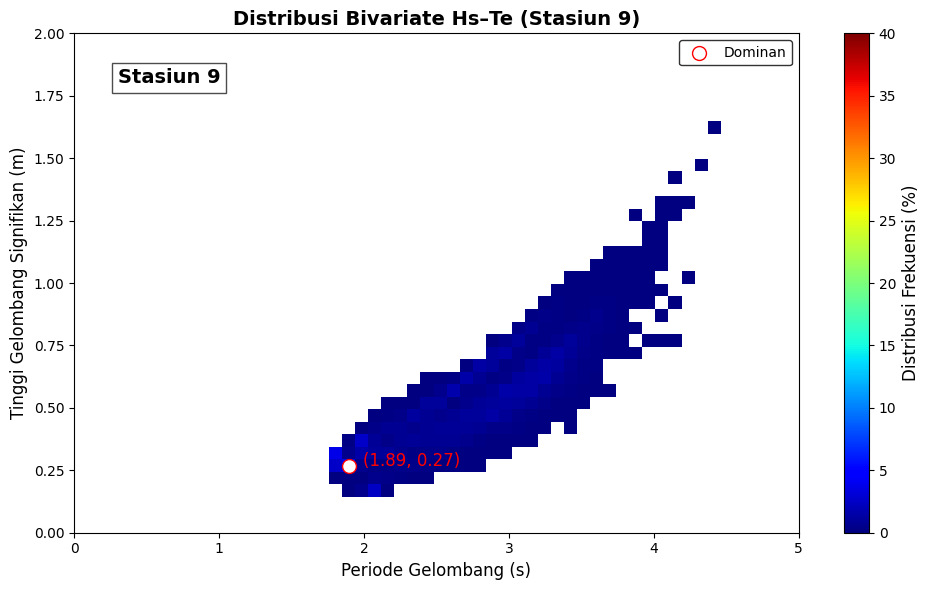

=== Analisis Distribusi Frekuensi Dominan ===
Tinggi Gelombang Signifikan Dominan (Hs): 0.27 meter
Periode Gelombang Dominan (Te): 1.89 detik
Frekuensi Distribusi Dominan: 3.79 %


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path ke file Excel baru (stasiun9.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun9.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Histogram 2D (heatmap) - frekuensi absolut
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet'
)

# Ekstrak data dari histogram
counts, x_edges, y_edges = np.array(hb[0]), hb[1], hb[2]  # counts adalah array frekuensi absolut

# Konversi frekuensi absolut ke persentase total
total_counts = np.sum(counts)
counts_percent = (counts / total_counts) * 100

# Menemukan frekuensi maksimum dalam persen
max_index_flat = np.argmax(counts_percent)  # Indeks maksimum dalam bentuk flat
max_freq_index = np.unravel_index(max_index_flat, counts_percent.shape)  # Indeks 2D

# Menghitung Te dan Hs dominan berdasarkan indeks maksimum
Te_dominant = (x_edges[max_freq_index[0]] + x_edges[max_freq_index[0] + 1]) / 2
Hs_dominant = (y_edges[max_freq_index[1]] + y_edges[max_freq_index[1] + 1]) / 2
max_freq_value_percent = counts_percent[max_freq_index]  # Nilai maksimum dalam persen

# Plot heatmap dengan masking nol
counts_masked = np.ma.masked_where(counts_percent == 0, counts_percent)
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(x_edges, y_edges, counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('Distribusi Bivariate Hs–Te (Stasiun 9)', fontsize=14, weight='bold')

# Menandai nilai dominan pada plot
plt.scatter(Te_dominant, Hs_dominant, color='white', edgecolor='red', s=100, label='Dominan')
plt.text(Te_dominant + 0.1, Hs_dominant, f'({Te_dominant:.2f}, {Hs_dominant:.2f})', color='red', fontsize=12)

# Menentukan rentang sumbu
plt.xlim(0, 5)
plt.ylim(0, 2)

# Menambahkan anotasi "Stasiun 9"
plt.text(
    0.3, 1.8, 'Stasiun 9',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menampilkan legenda
plt.legend(loc='upper right', fontsize=10, edgecolor='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan analisis frekuensi dominan
print("=== Analisis Distribusi Frekuensi Dominan ===")
print(f"Tinggi Gelombang Signifikan Dominan (Hs): {Hs_dominant:.2f} meter")
print(f"Periode Gelombang Dominan (Te): {Te_dominant:.2f} detik")
print(f"Frekuensi Distribusi Dominan: {max_freq_value_percent:.2f} %")


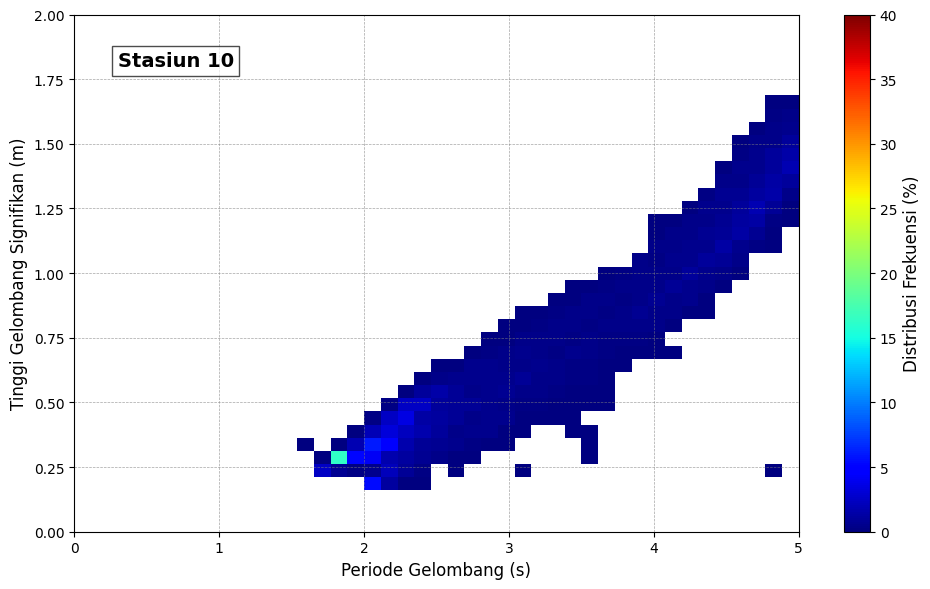

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Path ke file Excel (stasiun10.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun10.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan (opsional)
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Membuat histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Masking untuk menyembunyikan nilai nol di histogram
counts = hb[0]
counts_masked = np.ma.masked_where(counts == 0, counts)  # Mask nilai nol

# Menggambar ulang heatmap dengan masked array
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(hb[1], hb[2], counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('', fontsize=14, weight='bold')

# Menentukan rentang sumbu sesuai permintaan
plt.xlim(0, 5)  # Rentang sumbu X
plt.ylim(0, 2)  # Rentang sumbu Y

# Menambahkan anotasi "Stasiun 2"
plt.text(
    0.3, 1.8, 'Stasiun 10',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menyesuaikan tampilan grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


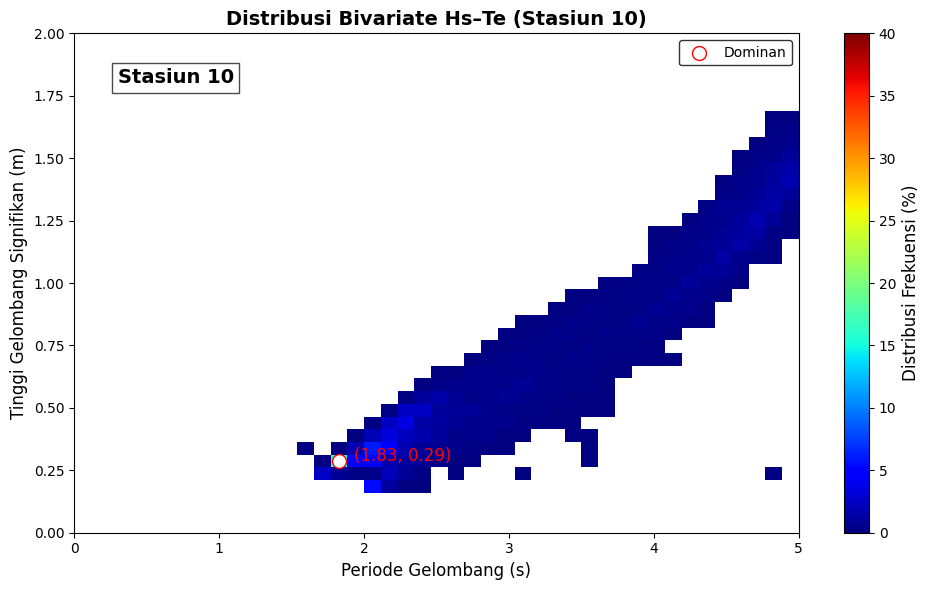

=== Analisis Distribusi Frekuensi Dominan ===
Tinggi Gelombang Signifikan Dominan (Hs): 0.29 meter
Periode Gelombang Dominan (Te): 1.83 detik
Frekuensi Distribusi Dominan: 1637.02 %


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path ke file Excel (stasiun10.xlsx)
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun10.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Histogram 2D (heatmap)
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet', density=True
)

# Ekstrak data dari histogram untuk analisis frekuensi dominan
counts, x_edges, y_edges = np.array(hb[0]), hb[1], hb[2]  # Pastikan counts adalah array NumPy
max_index_flat = np.argmax(counts)  # Indeks maksimum dalam bentuk flat
max_freq_index = np.unravel_index(max_index_flat, counts.shape)  # Indeks 2D

# Menghitung Te dan Hs dominan berdasarkan indeks maksimum
Te_dominant = (x_edges[max_freq_index[0]] + x_edges[max_freq_index[0] + 1]) / 2
Hs_dominant = (y_edges[max_freq_index[1]] + y_edges[max_freq_index[1] + 1]) / 2
max_freq_value = counts[max_freq_index] * 100  # Konversi ke persen

# Plot heatmap dengan masking nol
counts_masked = np.ma.masked_where(counts == 0, counts)
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(x_edges, y_edges, counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('Distribusi Bivariate Hs–Te (Stasiun 10)', fontsize=14, weight='bold')

# Menandai nilai dominan pada plot
plt.scatter(Te_dominant, Hs_dominant, color='white', edgecolor='red', s=100, label='Dominan')
plt.text(Te_dominant + 0.1, Hs_dominant, f'({Te_dominant:.2f}, {Hs_dominant:.2f})', color='red', fontsize=12)

# Menentukan rentang sumbu
plt.xlim(0, 5)
plt.ylim(0, 2)

# Menambahkan anotasi "Stasiun 10"
plt.text(
    0.3, 1.8, 'Stasiun 10',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menampilkan legenda
plt.legend(loc='upper right', fontsize=10, edgecolor='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan analisis frekuensi dominan
print("=== Analisis Distribusi Frekuensi Dominan ===")
print(f"Tinggi Gelombang Signifikan Dominan (Hs): {Hs_dominant:.2f} meter")
print(f"Periode Gelombang Dominan (Te): {Te_dominant:.2f} detik")
print(f"Frekuensi Distribusi Dominan: {max_freq_value:.2f} %")


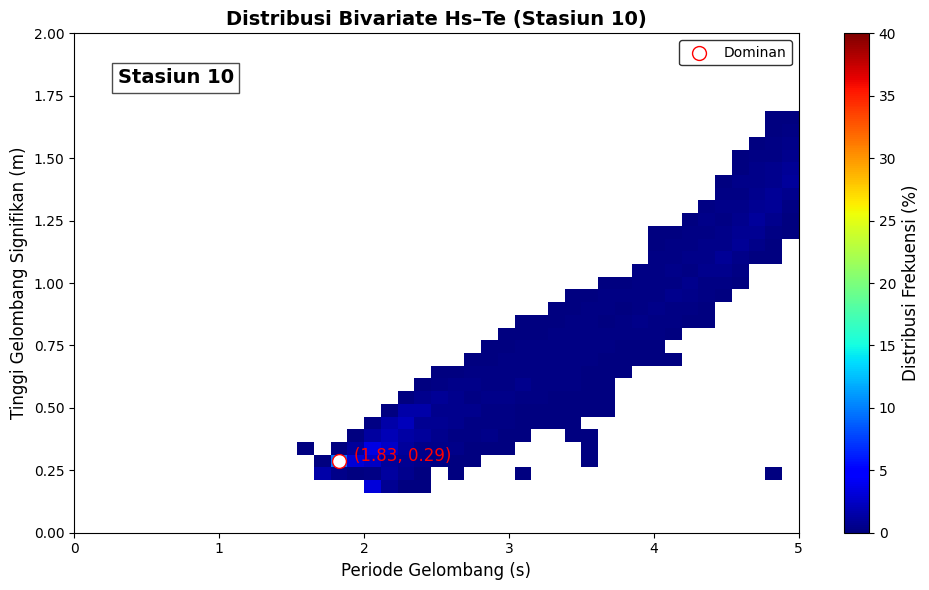

=== Analisis Distribusi Frekuensi Dominan ===
Tinggi Gelombang Signifikan Dominan (Hs): 0.29 meter
Periode Gelombang Dominan (Te): 1.83 detik
Frekuensi Distribusi Dominan: 9.61 %


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path ke file Excel
file_path = '/content/drive/MyDrive/TUGAS AKHIR/DATA JADI/DATA HASIL RATA RATA /diagram bivariate/stasiun10.xlsx'

# Membaca file Excel
df = pd.read_excel(file_path)

# Mengganti nama kolom agar lebih mudah digunakan
df.rename(columns={'SWH': 'Hs', 'PERIODE': 'Te'}, inplace=True)

# Filter hanya data yang berada dalam rentang fokus
df_filtered = df[(df['Te'] > 1.5) & (df['Te'] <= 5) & (df['Hs'] > 0.1) & (df['Hs'] <= 2)]

# Membuat histogram 2D untuk distribusi bivariate Hs dan Te
plt.figure(figsize=(10, 6))

# Histogram 2D (heatmap) - frekuensi absolut
hb = plt.hist2d(
    df_filtered['Te'], df_filtered['Hs'], bins=(30, 30), cmap='jet'
)

# Ekstrak data dari histogram
counts, x_edges, y_edges = np.array(hb[0]), hb[1], hb[2]  # counts adalah array frekuensi absolut

# Konversi frekuensi absolut ke persentase total
total_counts = np.sum(counts)
counts_percent = (counts / total_counts) * 100

# Menemukan frekuensi maksimum dalam persen
max_index_flat = np.argmax(counts_percent)  # Indeks maksimum dalam bentuk flat
max_freq_index = np.unravel_index(max_index_flat, counts_percent.shape)  # Indeks 2D

# Menghitung Te dan Hs dominan berdasarkan indeks maksimum
Te_dominant = (x_edges[max_freq_index[0]] + x_edges[max_freq_index[0] + 1]) / 2
Hs_dominant = (y_edges[max_freq_index[1]] + y_edges[max_freq_index[1] + 1]) / 2
max_freq_value_percent = counts_percent[max_freq_index]  # Nilai maksimum dalam persen

# Plot heatmap dengan masking nol
counts_masked = np.ma.masked_where(counts_percent == 0, counts_percent)
plt.clf()  # Hapus plot sebelumnya
plt.pcolormesh(x_edges, y_edges, counts_masked.T, cmap='jet', shading='auto', vmin=0, vmax=40)

# Menambahkan colorbar
cb = plt.colorbar()
cb.set_label('Distribusi Frekuensi (%)', fontsize=12)
cb.ax.tick_params(labelsize=10)

# Menambahkan label dan judul
plt.xlabel('Periode Gelombang (s)', fontsize=12)
plt.ylabel('Tinggi Gelombang Signifikan (m)', fontsize=12)
plt.title('Distribusi Bivariate Hs–Te (Stasiun 10)', fontsize=14, weight='bold')

# Menandai nilai dominan pada plot
plt.scatter(Te_dominant, Hs_dominant, color='white', edgecolor='red', s=100, label='Dominan')
plt.text(Te_dominant + 0.1, Hs_dominant, f'({Te_dominant:.2f}, {Hs_dominant:.2f})', color='red', fontsize=12)

# Menentukan rentang sumbu
plt.xlim(0, 5)
plt.ylim(0, 2)

# Menambahkan anotasi "Stasiun 10"
plt.text(
    0.3, 1.8, 'Stasiun 10',
    fontsize=14, color='black', weight='bold',
    bbox=dict(facecolor='white', alpha=0.7)
)

# Menampilkan legenda
plt.legend(loc='upper right', fontsize=10, edgecolor='black')

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan analisis frekuensi dominan
print("=== Analisis Distribusi Frekuensi Dominan ===")
print(f"Tinggi Gelombang Signifikan Dominan (Hs): {Hs_dominant:.2f} meter")
print(f"Periode Gelombang Dominan (Te): {Te_dominant:.2f} detik")
print(f"Frekuensi Distribusi Dominan: {max_freq_value_percent:.2f} %")
